## Exercício 3: Evolução dos Motores Turbofan

* Eloi Antonio
* Gabriel Henrique


Deseja-se produzir 100 kN no início da decolagem (Mach = 0) ao nível do mar (Ta =
288,2K e Pa = 101,3 kPa) usando motores turbofans com tecnologias de diferentes
décadas, conforme tabela abaixo (ponto de projeto estático ao nível do mar).

**A)** Compare a vazão de ar, consumo de combustível, consumo específico de combustível e empuxo específico (parâmetros de desempenho) na condição de projeto, estática ao nível do mar.

#### Geração dos resultados 

Para a resolução deste exercício são utilizados os valores de eficiência dos componentes, constante do gás para o ar e poder calorífico do combustível definidos para o Exercício 2. Para garantir que os diferentes motores gerassem o empuxo total igual a 100 kN na condição estática a nível do mar foram calibrados os valores de vazão mássica de ar na entrada para cada motor. Os resultados são indicados nas tabelas e gráficos seguintes:

In [1]:
import model_reference as mf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

values_60 = {
    'pa': 101.3,
    'ta': 288.2,
    'n_d': 0.97,
    'n_f': 0.85,
    'n_c': 0.85,
    'n_b': 1.0,
    'n_t': 0.9,
    'n_tf': 0.9,
    'n_n': 0.98,
    'n_nf': 0.98,
    'gamma_d': 1.4,
    'gamma_f': 1.4,
    'gamma_c': 1.37,
    'gamma_b': 1.35,
    'gamma_t': 1.33,
    'gamma_tf': 1.33,
    'gamma_n': 1.36,
    'gamma_nf': 1.40,
    'prc': 10,          # Razão de pressão do compressor
    'prf': 1.5,         # Razão de pressão do fan
    'bypass_ratio': 2,  # B
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'r': 288.3,
    't04': 1323,          # T04  
    'mach': 0,
    'mass_flow': 266.45, # Vazão mássica (fluxo de massa)
    }

turbofan_60 = mf.TurboFan(values_60)
performance_results_60 = turbofan_60.sumarise_results()
thermodynamic_results_60 = turbofan_60.sumarise()

# Criação de dataframe que contém os valores de interesse para todos os motores (adicionando o primeiro motor)
performance_results_q3 = performance_results_60.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
performance_results_q3 = performance_results_q3.rename({1: '60/70'}, axis=1)

In [2]:
# Instanciando motor geração década de 70/80
values_70 = values_60.copy()
values_70.update({'t04': 1523,'bypass_ratio':4,'prc':16.67,'mass_flow':306.150})

turbofan_70 = mf.TurboFan(values_70)
performance_results_70 = turbofan_70.sumarise_results()
thermodynamic_results_70 = turbofan_70.sumarise()

# Adição do segundo motor ao dataset geral
performance_results_q3['70/80'] = performance_results_70.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

# Instanciando motor geração década de 80/90
values_80 = values_60.copy()
values_80.update({'t04': 1623,'bypass_ratio':5,'prc':21.33, 'mass_flow': 318.351})

turbofan_80 = mf.TurboFan(values_80)
performance_results_80= turbofan_80.sumarise_results()
thermodynamic_results_80= turbofan_80.sumarise()

# Adição do terceiro motor ao dataset geral
performance_results_q3['80/90'] = performance_results_80.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

# Instanciando motor geração década de 90/00
values_90 = values_60.copy()
values_90.update({'t04': 1823,'bypass_ratio':8,'prc':24,'mass_flow':343.350})

turbofan_90 = mf.TurboFan(values_90)
performance_results_90 = turbofan_90.sumarise_results()
thermodynamic_results_90 = turbofan_90.sumarise()

# Adição do quarto motor ao dataset geral
performance_results_q3['90/00'] = performance_results_90.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

# Instanciando motor geração década de 00/10
values_00 = values_60.copy()
values_00.update({'t04': 1973,'bypass_ratio':10,'prc':32,'mass_flow':356.221})

turbofan_00 = mf.TurboFan(values_00)
performance_results_00 = turbofan_00.sumarise_results()
thermodynamic_results_00 = turbofan_00.sumarise()

# Adição do quinto motor ao dataset geral
performance_results_q3['00/10'] = performance_results_00.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

In [3]:
['Geração do Motor','mass_flow', 'total_thrust']

motores = ['60/70','70/80','80/90','90/00','00/10']

mass_flow = [round(turbofan_60.mass_flow,3),
            round(turbofan_70.mass_flow,3),
            round(turbofan_80.mass_flow,3),
            round(turbofan_90.mass_flow,3),
            round(turbofan_00.mass_flow,3)]
total_thrust = [round(performance_results_60.loc['thrust_total'],1),
                round(performance_results_70.loc['thrust_total'],1),
                round(performance_results_80.loc['thrust_total'],1),
                round(performance_results_90.loc['thrust_total'],1),
                round(performance_results_00.loc['thrust_total'],1)]

#df = pd.DataFrame(list(zip(motores, mass_flow,total_thrust)),
#               columns =['Década do motor', ' Vazão mássica de ar na entrada [kg/s]',' Empuxo total [kN]'])
df = pd.DataFrame(list(zip(mass_flow,total_thrust)), index = motores,
               columns =[' Vazão mássica de ar na entrada [kg/s]',' Empuxo total [kN]'])
df.index.rename('Década do motor',inplace=True)
print(df.to_markdown())

| Década do motor   |    Vazão mássica de ar na entrada [kg/s] |    Empuxo total [kN] |
|:------------------|-----------------------------------------:|---------------------:|
| 60/70             |                                  266.338 |                  100 |
| 70/80             |                                  306.021 |                  100 |
| 80/90             |                                  318.217 |                  100 |
| 90/00             |                                  343.206 |                  100 |
| 00/10             |                                  356.071 |                  100 |


***Calibração da vazão mássica de ar***

| Década do motor   |    Vazão mássica de ar na entrada [kg/s] |    Empuxo total [kN] |
|:------------------|-----------------------------------------:|---------------------:|
| 60/70             |                                  266.338 |                  100 |
| 70/80             |                                  306.021 |                  100 |
| 80/90             |                                  318.217 |                  100 |
| 90/00             |                                  343.206 |                  100 |
| 00/10             |                                  356.071 |                  100 |

In [4]:
print(performance_results_q3.transpose().round(3).to_markdown())

|       |   hot_mass_flow |   fuel_consumption |   TSFC |   specific_thrust |
|:------|----------------:|-------------------:|-------:|------------------:|
| 60/70 |          88.779 |              1.491 |  0.015 |             1.126 |
| 70/80 |          61.204 |              1.179 |  0.012 |             1.634 |
| 80/90 |          53.036 |              1.083 |  0.011 |             1.886 |
| 90/00 |          38.134 |              0.951 |  0.01  |             2.622 |
| 00/10 |          32.37  |              0.874 |  0.009 |             3.089 |


***Comparação dos parâmetros de desempenho entre os motores***

|  Década do motor     |   Vazão mássica de gases quentes [kg/s] |   Consumo de combustível [kg/s] |   TSFC [Kg/(kN s)] |   Empuxo Específico [(kN s)/kg] |
|:------|----------------:|-------------------:|-------:|------------------:|
| 60/70 |          88.779 |              1.491 |  0.015 |             1.126 |
| 70/80 |          61.204 |              1.179 |  0.012 |             1.634 |
| 80/90 |          53.036 |              1.083 |  0.011 |             1.886 |
| 90/00 |          38.134 |              0.951 |  0.01  |             2.622 |
| 00/10 |          32.37  |              0.874 |  0.009 |             3.089 |

***Gráficos contendo os parâmetros de desempenho***

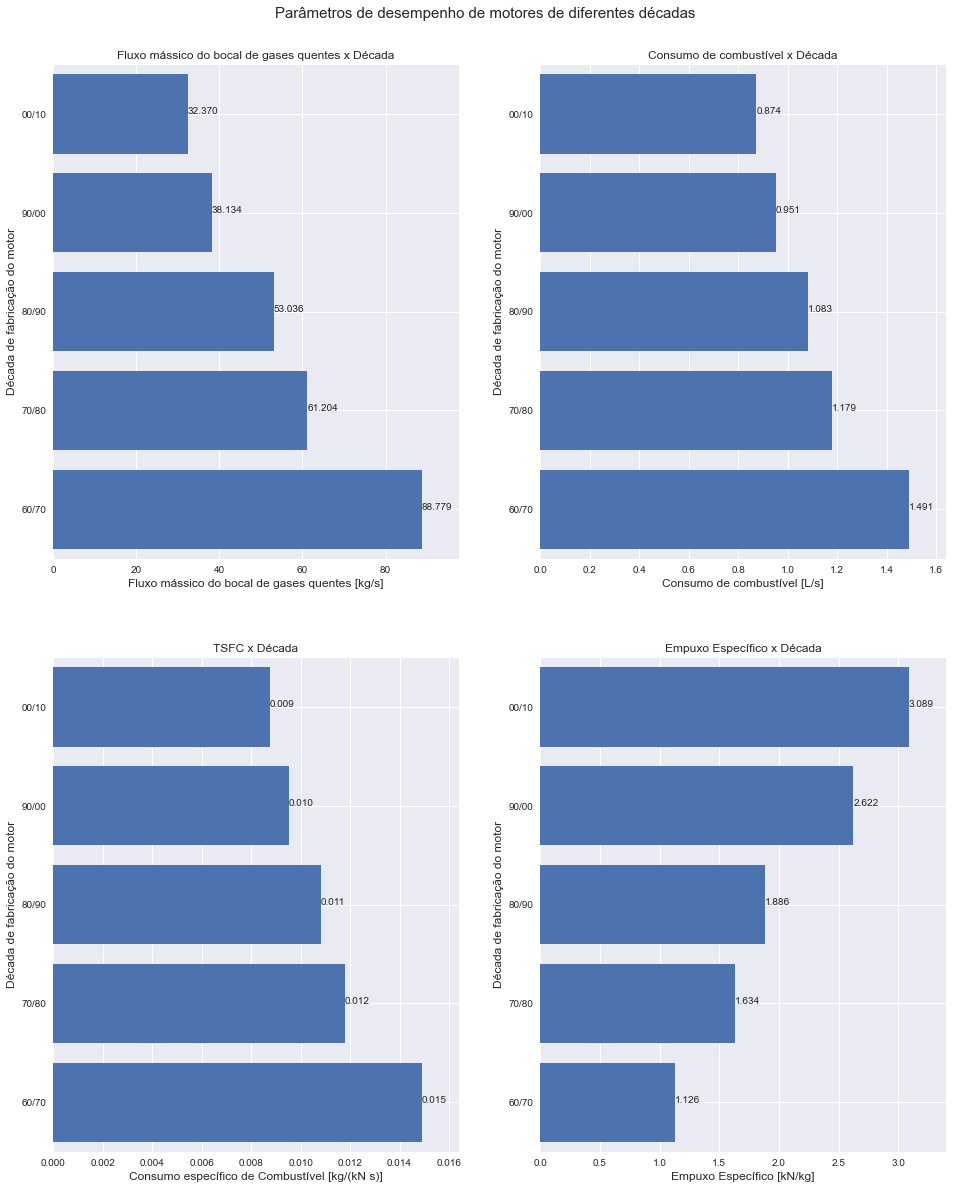

In [5]:
fontsize_label = 12 
fontsize_title = 15

aux=0
cols = 2
rows = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho de motores de diferentes décadas',fontsize=fontsize_title, y=0.92)#, fontsize=30)

# Definicão dos títulos e indices dos gráficos
titulos=['Fluxo mássico do bocal de gases quentes x Década','Consumo de combustível x Década','TSFC x Década','Empuxo Específico x Década']
ylabels=['Fluxo mássico do bocal de gases quentes [kg/s]','Consumo de combustível [L/s]','Consumo específico de Combustível [kg/(kN s)]','Empuxo Específico [kN/kg]']

for i in range(0,rows):
    for j in range(0,cols):
        plt.sca(ax[i,j])
        ax[i,j].set_ylabel('Década de fabricação do motor',fontsize=fontsize_label)
        ax[i,j].set_xlabel(ylabels[aux],fontsize=fontsize_label)
        bars = plt.barh(['60/70','70/80','80/90','90/00','00/10'],performance_results_q3.iloc[aux])
        #[xmin xmax ymin ymax]
        plt.axis([0, max(performance_results_q3.iloc[aux])*1.1,-0.5 , 4.5])
        plt.title(titulos[aux])
        for  bar in bars:
            width = bar.get_width()
            label_y = bar.get_y() + bar.get_height() / 2
            plt.text(width, label_y, s=f'{width:.3f}')
        aux += 1

# save the plot as a file
fig.savefig('images/questao3/itemA.jpg',
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

#### Análise dos resultados

A partir dos dados é possível concluir que houve um aumento da eficiência na geração de empuxo ao modernizar os motores turbofan. Isso pode ser confirmado quando verificado que para um mesmo valor de empuxo (nesse exercício o empuxo total gerado foi de 100kN) menores valores de consumo de combustível específico e maiores valores do empuxo específico são obtidos a medida em que são analisados motores de décadas subsequentes.
 
Ademais é possível constatar a diminuição do fluxo mássico de gases quentes a medida que se avança em gerações subsequentes de motores turbofan. Que pode ser explicado pelos seguintes fatores:
- Aumento da razão de passagem é possibilitado um aumento na geração do empuxo sem a necessidade de aumento da vazão mássica que adentra o interior do motor; 
- Aumento da razão de pressão do compressor possibilitando que um menor fluxo mássico de ar de gases quentes seja capaz de produzir uma quantidade maior de empuxo.

### B) Variação da rotação do compressor na condição estática a nível do mar
Ainda na condição estática e ao nível do mar, varie a rotação até 70% de N2 e
compare como cada motor se comporta sobre os parâmetros de desempenho e
empuxo em valores absolutos e normalizados pela condição de 100% de N2.

#### Geração dos resultados 

Partindo dos valores de projeto definidos no item "a", foram variadas os valores de velocidade de rotação do compressor (N2) e os índices de desempenho de cada motor nessas condições foram avaliadas. A seguir são apresentados os gráficos contendo os resultados encontrados, tanto em valores absolutos quanto em valores normalizados. Essa normalização foi realizada tendo como referência os valores no ponto de projeto (N2 = 100%) calculados no item "a".

***Gráficos contendo os parâmetros de desempenho para motores***


In [6]:
# Instanciando novo dataframe a partir dos resultados para N2 = 100%
performance_results_3b = performance_results_q3.copy(deep=True)
performance_results_3b.loc['n2'] = [1,1,1,1,1]

In [7]:
performance_list= []
for i in np.linspace(1.0,0.7,10):
    # Setando nova rotação em n2
    turbofan_60.set_n2(i)
    turbofan_70.set_n2(i)
    turbofan_80.set_n2(i)
    turbofan_90.set_n2(i)
    turbofan_00.set_n2(i)

    # Atualizando o dataframe com novos resultados
    performance_results_3b['60/70'] = turbofan_60.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['70/80'] = turbofan_70.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['80/90'] = turbofan_80.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['90/00'] = turbofan_90.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['00/10'] = turbofan_00.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b.loc['n2']=[i,i,i,i,i]
    
    # Adicionando os resultados na listas de dataframes
    performance_list.append(performance_results_3b.copy(deep=True))

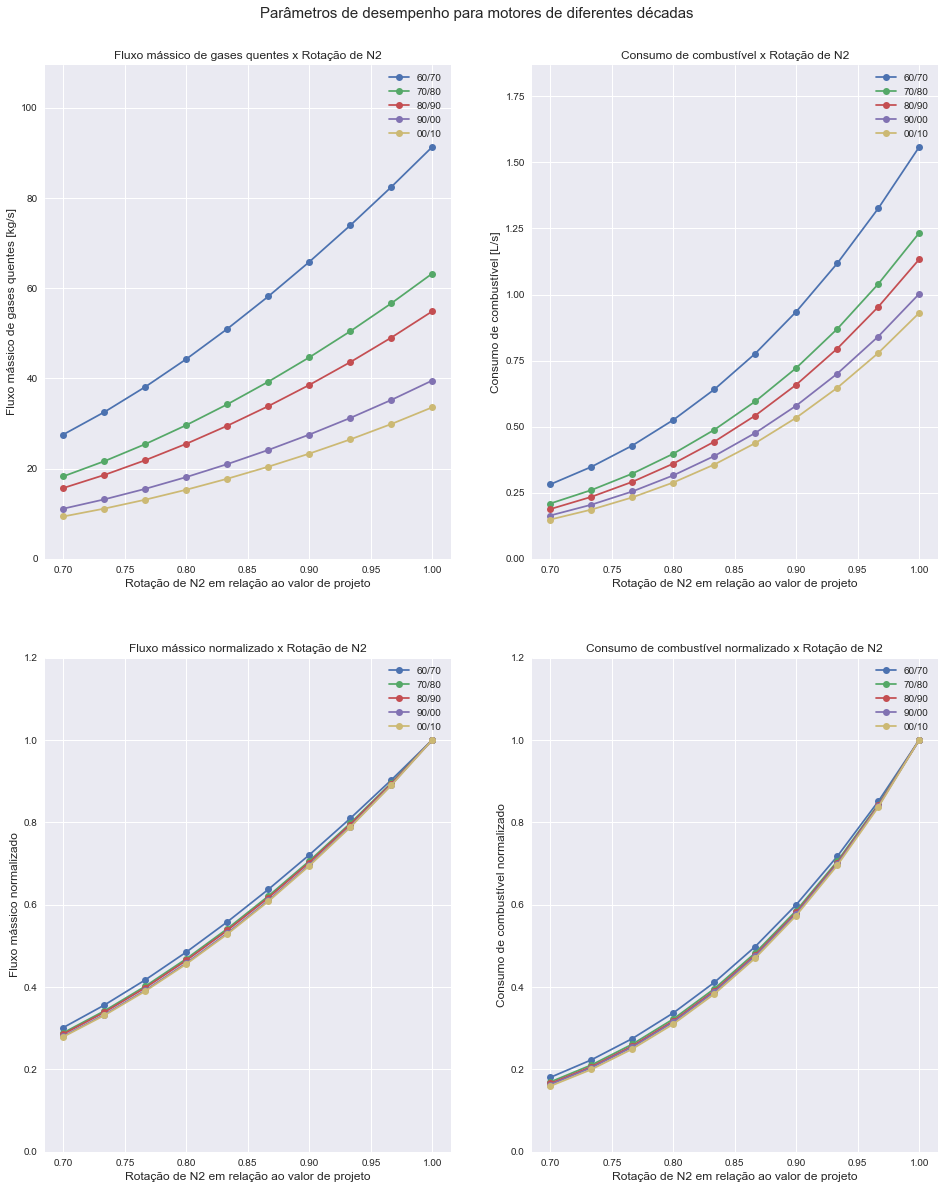

In [8]:
cols = 2
rows = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho para motores de diferentes décadas',fontsize=fontsize_title, y=0.92)#, fontsize=30)

# Definicão dos títulos e indices dos gráficos
titulos=['Fluxo mássico de gases quentes x Rotação de N2','Consumo de combustível x Rotação de N2','Fluxo mássico normalizado x Rotação de N2','Consumo de combustível normalizado x Rotação de N2']
ylabels=['Fluxo mássico de gases quentes [kg/s]','Consumo de combustível [L/s]','Fluxo mássico normalizado','Consumo de combustível normalizado']
labels = ['60/70','70/80','80/90','90/00','00/10']

aux = 0
i=0
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux],fontsize=fontsize_label)
    ax[i,j].set_ylim(0,1.2*performance_list[0][labels[0]].iloc[aux])
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux])
    plt.legend()
    aux += 1
i = 1
aux = 0
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux+2],fontsize=fontsize_label)
    ax[i,j].set_ylim(0,1.2*performance_list[0][labels[0]].iloc[aux]/performance_list[0][labels[0]].iloc[aux])
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux+2])
    plt.legend()
    aux += 1

# save the plot as a file
fig.savefig('images/questao3/itemB_1.jpg',
            format='jpeg',
            dpi=300,
            bbox_inches='tight')


<img src="images/questao3/itemB_1.jpg" alt="Fluxo mássico e consumo de combustível das diferentes geracoes de motores variando N2" style="width: 15 cm;"/>

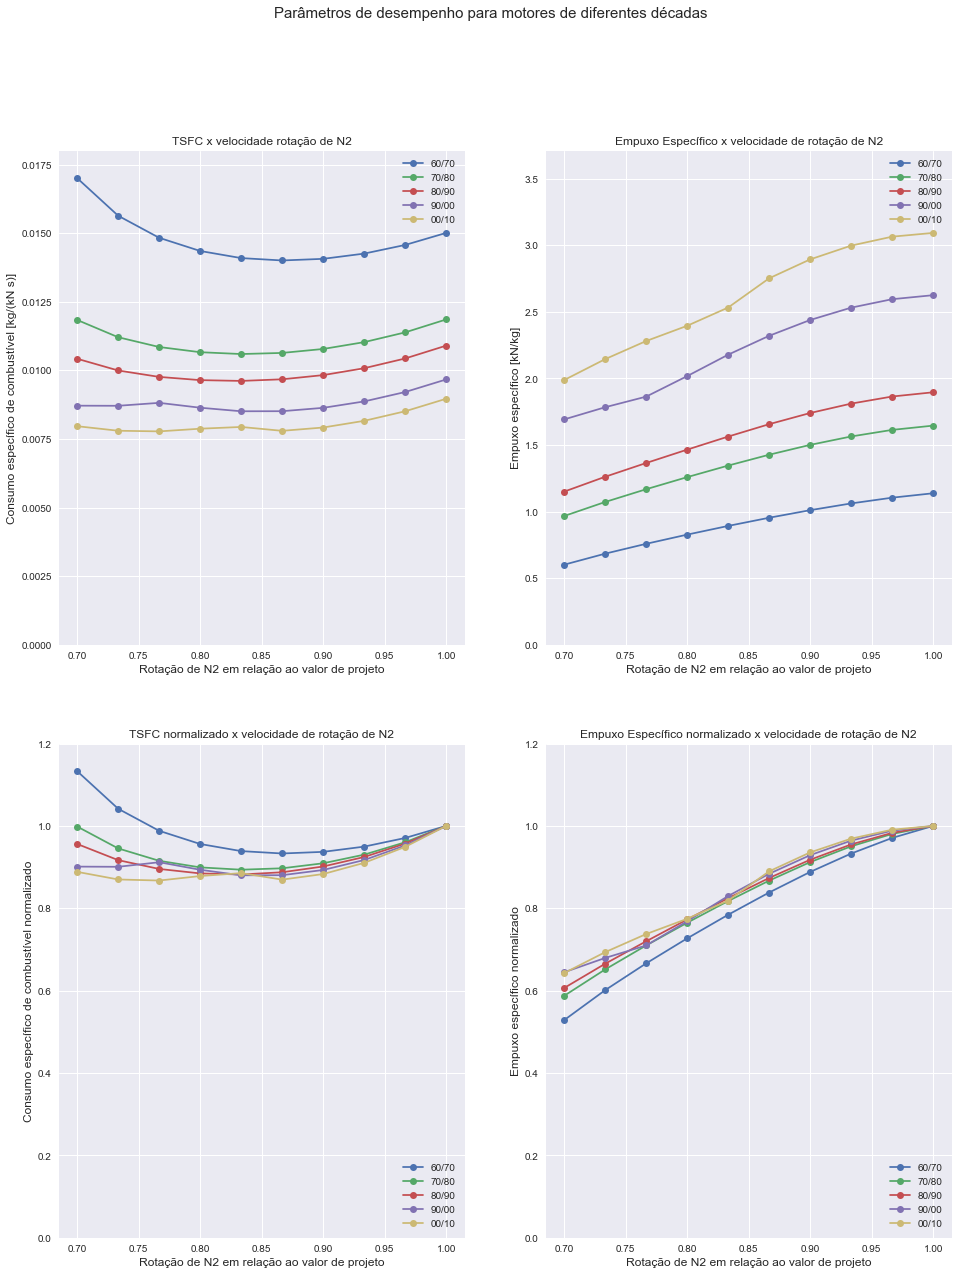

In [9]:
cols = 2
rows = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho para motores de diferentes décadas',fontsize=fontsize_title)
# Definicão dos títulos e indices dos gráficos
titulos=['TSFC x velocidade rotação de N2','Empuxo Específico x velocidade de rotação de N2','TSFC normalizado x velocidade de rotação de N2','Empuxo Específico normalizado x velocidade de rotação de N2']
ylabels=['Consumo específico de combustível [kg/(kN s)]','Empuxo específico [kN/kg]','Consumo específico de combustível normalizado','Empuxo específico normalizado']
labels = ['60/70','70/80','80/90','90/00','00/10']

aux = 2
i=0
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux-2],fontsize=fontsize_label)
    ax[i,j].set_ylim(0,1.2*max(performance_list[0][labels[0]].iloc[aux], performance_list[0][labels[4]].iloc[aux]))
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux-2])
    plt.legend()
    aux += 1
i = 1
aux = 2
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux],fontsize=fontsize_label)
    ax[i,j].set_ylim(0,1.2*performance_list[0][labels[0]].iloc[aux]/performance_list[0][labels[0]].iloc[aux])
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux])
    
    plt.legend(loc='lower right')
    aux += 1

# save the plot as a file
fig.savefig('images/questao3/itemB_2.jpg',
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

<img src="images/questao3/itemB_2.jpg" alt="TSFC e Empuxo Específico das diferentes geracoes de motores variando N2" style="width: 15 cm;"/>

#### Análise dos resultados

A partir dos gráficos é possível verificar que conforme a rotação do compressor é diminuída, há uma menor vazão de ar quente no motor, visto que há uma relação diretamente proporcional entre a rotação do compressor e a quantidade de fluxo de ar que admite. Ademais, também é observada uma redução do consumo de combustível com a redução da rotação, a qual inclusive é mais acentuada do que a queda de vazão mássica de ar quente. Esta redução do consumo de combustível ocorre, primeiramente, por conta da redução da vazão mássica de ar quente no motor, que implica na diminuição da necessidade de injeção de combustível para ignitar o ar. Mas a redução do consumo de combustível também ocorre por questões de manutenção do motor: como o motor não está operando em máxima potência quando a rotação do compressor é reduzida, a câmara de combustão do motor não precisa operar na mesma temperatura em que opera na condição de rotação máxima, o que é desejável para que reduzir a danificação dos componentes da parte quente do motor; e para ter essa diminuição de temperatura, a razão ar/combustível precisa ser reduzida, o que implica na redução mais acelerada do consumo de combustível.

No que diz respeito à comparação entre diferentes gerações de motores, é possível perceber que os motores desenvolvidos nas décadas mais recentes apresentam uma melhora significativa na quantidade de fluxo de ar e de combustível consumido. Porém, o comportamento normalizado em função da diminuição de rotação é similar para todas as gerações, com uma certa vantagem para as gerações mais novas.

A partir do gráfico de consumo específico de combustível (TSFC) é observado um comportamento não-linear à medida que a variação de rotação do compressor. Nisto com a diminuição da rotação até cerca de 85% da rotação de N2 em ponto de projeto o parâmetro TSFC é levemente reduzido, mas ao diminuir ainda mais N2, ocorre o comportamento inverso com o aumento de TSFC. Isso pode ser explicado sabendo que a nas rotações próximas ao ponto de projeto operação do motor é mantida com uma eficiência praticamente constante, mas nos regimes de menor rotação, a eficiência do motor começa a ser comprometida, resultando na necessidade de maior TSFC.

E com o aumento do TSFC aliado à redução da razão combustível-ar, o empuxo específico (que consiste na divisão entre a razão combustível-ar e o TSFC) acaba sofrendo uma redução com a diminuição da rotação do compressor. Inicialmente, a rotações próximas do ponto de projeto, o empuxo específico, sofre menores reduções, visto que o TSFC praticamente não sofre alteração e, assim, não interfere na perda de empuxo específico. Porém, à medida que o TSFC vai sendo aumentado, uma vez que diminui-se a rotação N2, o empuxo específico passa a ter uma taxa de redução ainda mais acentuada.

Porém, para os modelos de motores turbofan que apresentam alta razão de passagem (B>5) são percebidos pontos de inflexão tanto no gráfico de empuxo específico x rotação de N2 quanto de TSFC x rotação de N2. Esses pontos revelam uma limitação no modelo para representar o comportamento de motores com alta razão de passagem. Ao qual está relacionada a diminuição da pressão no bocal de saída dos gases quentes chegando esta a ser menor que a pressão atmosférica o que resulta em valores de velocidade de saída do bocal de gases quentes não condizentes (valores NaN) com o observado fisicamente, assim se pode concluir para o motor da década de 2000-2010 os valores disponíveis nos gráficos são validos de 100% até 85% de N2 e para o motor da década de 1990/2000 existe validade dos dados de 100% até aproximadamente 80% de N2. 

Portanto comparando os motores de diferentes gerações, é possível notar que os motores desenvolvidos nas décadas mais recentes, são mais eficientes tanto no consumo de combustível (já que apresentam menor TSFC) e na geração de empuxo específico. Finalmente no que se refere ao TSFC, também é observado que os motores turbofan mais novos são capazes de se manter mais eficientes a velocidades de rotação do compressor mais baixas, o que é comprovado pelo menor aumento do TSFC.

### C) Parâmetros de desempenho a voo de cruzeiro
Pensando no voo de cruzeiro a Mach 0,85 e 12.200m ((Ta = 216,7K e Pa =
18,75 kPa) e que os motores operam a 85% de N2, calcule os parâmetros de
desempenho anteriores, somando-se a eles o empuxo gerado.

#### Geração dos resultados 

Nesse exercício manteve-se os valores de eficiências dos componentes do motor, de $\gamma$, da constantes do gás e poder calorífico do combustível  do item "a".

Porém para o cálculo dos parâmetros de desempenho nas condições estabelecidas foi realizada uma nova avaliação de operação dos motores a voo de cruzeiro (M=0.85, Ta=216,7 K e Pa= 18,75 kPa) e com uma rotação do compressor igual a 85% do valor de projeto.

Ademais foram atualizadas as vazões mássicas de ar para a altitude de 12.200 m. Dessa maneira são disponibilizados na tabela e gráficos seguintes os resultados obtidos:

In [10]:
values_60.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_70.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_80.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_90.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_00.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})

# Atualizando objetos com os valores do problema
turbofan_60 = mf.TurboFan(values_60)
turbofan_70 = mf.TurboFan(values_70)
turbofan_80 = mf.TurboFan(values_80)
turbofan_90 = mf.TurboFan(values_90)
turbofan_00 = mf.TurboFan(values_00)

# Setando a rotação de N2 para 85%
turbofan_60.set_n2(0.85)
turbofan_70.set_n2(0.85)
turbofan_80.set_n2(0.85)
turbofan_90.set_n2(0.85)
turbofan_00.set_n2(0.85)

In [11]:
# Inicializando dataframe do exercício 
performance_results_3c = performance_results_q3.copy(deep=True)

# Adicionando ao dataframe a linha relativa ao Empuxo total
performance_results_3c.loc['thrust_total'] = [0,0,0,0,0]

# Atualizando valores a partir da nova condição de voo
performance_results_3c['60/70'] = turbofan_60.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['70/80'] = turbofan_70.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['80/90'] = turbofan_80.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['90/00'] = turbofan_90.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['00/10'] = turbofan_00.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c.loc['n2'] = [0.85,0.85,0.85,0.85,0.85]

In [12]:
print(performance_results_3c.transpose().round(3).to_markdown())
# print(performance_results.transpose().round(3).to_latex())

|       |   hot_mass_flow |   fuel_consumption |   TSFC |   specific_thrust |   thrust_total |   n2 |
|:------|----------------:|-------------------:|-------:|------------------:|---------------:|-----:|
| 60/70 |          13.415 |              0.201 |  0.026 |             0.583 |          7.822 | 0.85 |
| 70/80 |           9.031 |              0.154 |  0.022 |             0.76  |          6.867 | 0.85 |
| 80/90 |           7.78  |              0.141 |  0.021 |             0.849 |          6.609 | 0.85 |
| 90/00 |           5.54  |              0.121 |  0.02  |             1.09  |          6.038 | 0.85 |
| 00/10 |           4.687 |              0.111 |  0.019 |             1.237 |          5.797 | 0.85 |


**Comparação entre os motores turbofan de diferentes décadas**
|  Década do motor     |   Vazão mássica de gases quentes [kg/s] |   Consumo de combustível [kg/s] |   TSFC [Kg/(kN s)] |   Empuxo Específico [(kN s)/kg] | Empuxo total [kN] | N2 |
|:------|----------------:|-------------------:|-------:|------------------:|---------------:|-----:|
| 60/70 |          13.415 |              0.201 |  0.026 |             0.583 |          7.822 | 0.85 |
| 70/80 |           9.031 |              0.154 |  0.022 |             0.76  |          6.867 | 0.85 |
| 80/90 |           7.78  |              0.141 |  0.021 |             0.849 |          6.609 | 0.85 |
| 90/00 |           5.54  |              0.121 |  0.02  |             1.09  |          6.038 | 0.85 |
| 00/10 |           4.687 |              0.111 |  0.019 |             1.237 |          5.797 | 0.85 |

***Gráficos contendo os parâmetros de desempenho***

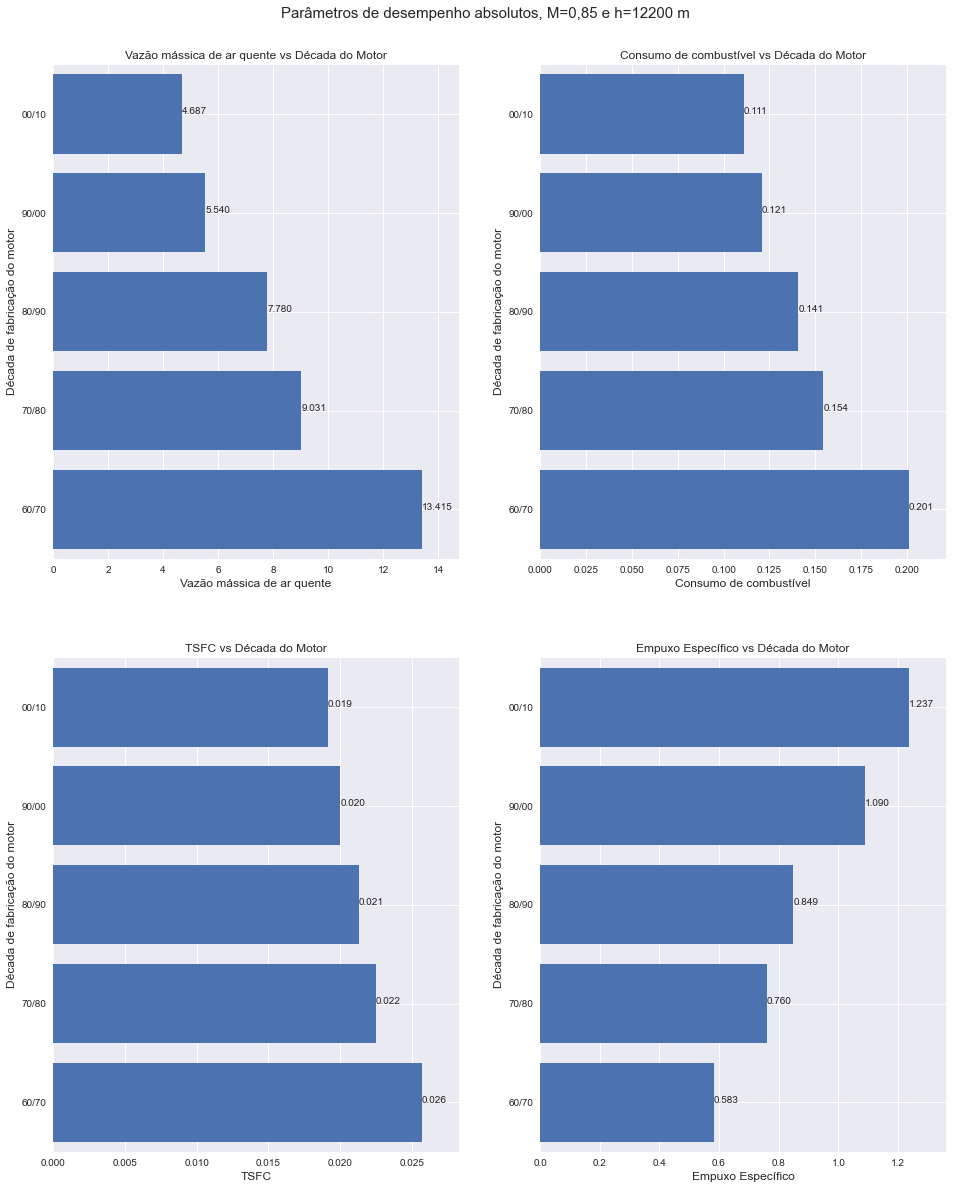

In [13]:
ylabels = ['Vazão mássica de ar quente', 'Consumo de combustível', 'TSFC', 'Empuxo Específico']
titulos = list(map(lambda x: x + " vs Década do Motor", ylabels))
aux=0
cols = 2
rows = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho absolutos, M=0,85 e h=12200 m',fontsize=fontsize_title, y=0.92)#, fontsize=30)

for i in range(0,rows):
    for j in range(0,cols):
        plt.sca(ax[i,j])
        ax[i,j].set_ylabel('Década de fabricação do motor',fontsize=fontsize_label)
        ax[i,j].set_xlabel(ylabels[aux],fontsize=fontsize_label)
        bars = plt.barh(['60/70','70/80','80/90','90/00','00/10'],performance_results_3c.iloc[aux])
        #[xmin xmax ymin ymax]
        plt.axis([0, max(performance_results_3c.iloc[aux])*1.1,-0.5 , 4.5])
        plt.title(titulos[aux])
        for  bar in bars:
            width = bar.get_width()
            label_y = bar.get_y() + bar.get_height() / 2
            plt.text(width, label_y, s=f'{width:.3f}')
        aux += 1

# save the plot as a file
fig.savefig('images/questao3/itemC_1.jpg',
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

<img src="images/questao3/itemC_1.jpg" alt="Parametros de desempenho das diferentes geracoes de motores" style="width: 15 cm;"/>

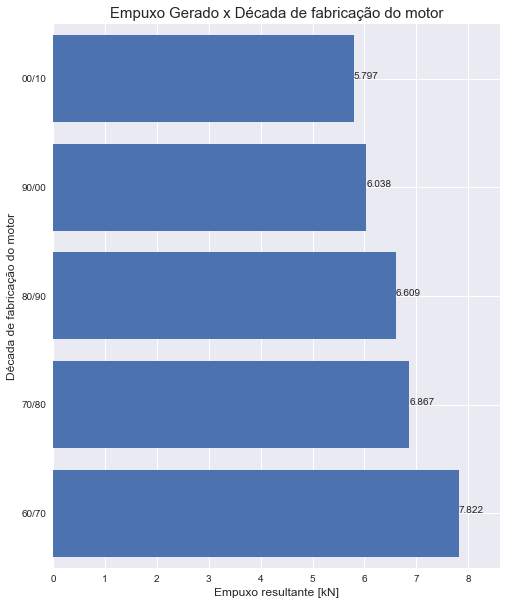

In [14]:
fig = plt.figure(figsize=(8,10))
bars = plt.barh(['60/70', '70/80', '80/90', '90/00', '00/10'],
                performance_results_3c.loc['thrust_total'])
plt.axis([0, max(performance_results_3c.loc['thrust_total'])*1.1, -0.5, 4.5])
for bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width:.3f}')

plt.title('Empuxo Gerado x Década de fabricação do motor', fontsize=fontsize_title)
plt.ylabel('Década de fabricação do motor', fontsize = fontsize_label)
plt.xlabel('Empuxo resultante [kN]', fontsize = fontsize_label)

fig.savefig('images/questao3/itemC_2.jpg',
            format='jpeg',
            dpi=350,
            bbox_inches='tight')

<img src="images/questao3/itemC_2.jpg" alt="Empuxo gerado pelas diferentes geracoes de motores" style="width: 7.5 cm;"/>

#### Análise dos resultados

Com o aumento da altitude de voo é possível identificar um aumento do TSFC e diminuição do empuxo específico, o que é consequência da queda de massa específica do ar e do fluxo de quantidade de movimento na entrada do motor (que é acrescido com a razão de passagem e velocidade de voo). Este último é diminuido do empuxo gerado pela exaustão dos gases nas saídas dos bocais.

A redução verificada na vazão mássica de gases quentes é consequência direta da diminuição da vazão da massa de ar que entra no motor que por sua vez é resultado da diminuição da massa específica do ar atmosférico em maiores altitudes. 

Similarmente ao verificado no item "a" ocorre a diminuição do consumo de combustível, uma vez que há menor necessidade de sua injeção na mistura ar-combustível.

Em relação ao empuxo gerado nas condições de vôo em cruzeiro é possível notar que há uma redução do seu valor quando comparado com o valor verificado em condições á nível do mar. Além disso os motores mais recentes necessitam gerar menos empuxo para manter a aeronave nas condições de voo de cruzeiro o que corrobora com a maior eficiência de gerações mais novas de motores.
